# Imports

In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

     ------------------------------------ 378.2/378.2 kB 714.6 kB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyMeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=4f020202e32d1a6219045a2c40ab9f5c26b9f5977cd06c84de6abefe3bc7176a
  Stored in directory: c:\users\joshl\appdata\local\pip\cache\wheels\9b\0a\31\eb0e590d74ec13e90493cb6d1cd92a379a1a3b8f12ed778a14
Successfully built PyMeeus


# Load the Data

In [101]:
df = pd.read_csv('Data/Chicago/Chicago-Crime_2010.csv')
df['Datetime'] = pd.to_datetime(df['Date'])

In [102]:
df_ts = df.set_index('Datetime')
df_ts

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2010-01-01 01:00:00,7592258,01/01/2010 01:00:00 AM,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,2422,24.0,49.0,42.019716,-87.666177
2010-01-01 13:00:00,7297433,01/01/2010 01:00:00 PM,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,1532,15.0,28.0,41.888659,-87.748993
2010-01-01 01:00:00,7298225,01/01/2010 01:00:00 AM,THEFT,FROM BUILDING,RESIDENCE,False,False,613,6.0,21.0,41.742683,-87.651098
2010-01-01 01:00:00,7297408,01/01/2010 01:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1112,11.0,27.0,41.896320,-87.718782
2010-01-01 01:00:00,7297265,01/01/2010 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,833,8.0,13.0,41.772403,-87.732358
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 00:45:00,7868622,12/31/2010 12:45:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,331,3.0,5.0,41.773485,-87.573221
2010-12-31 12:50:00,7869132,12/31/2010 12:50:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2432,24.0,40.0,42.001065,-87.661254
2010-12-31 00:53:00,7868511,12/31/2010 12:53:00 AM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,611,6.0,17.0,41.751181,-87.663461


# Inspect the Data

In [103]:
df_ts.index

DatetimeIndex(['2010-01-01 01:00:00', '2010-01-01 13:00:00',
               '2010-01-01 01:00:00', '2010-01-01 01:00:00',
               '2010-01-01 01:00:00', '2010-01-01 01:00:00',
               '2010-01-01 01:00:00', '2010-01-01 01:00:00',
               '2010-01-01 01:00:00', '2010-01-01 01:00:00',
               ...
               '2010-12-31 00:45:00', '2010-12-31 12:45:00',
               '2010-12-31 00:45:00', '2010-12-31 12:45:00',
               '2010-12-31 00:45:00', '2010-12-31 00:45:00',
               '2010-12-31 12:50:00', '2010-12-31 00:53:00',
               '2010-12-31 00:55:00', '2010-12-31 00:58:00'],
              dtype='datetime64[ns]', name='Datetime', length=370494, freq=None)

- The 'Date' column is already set as the index of the dataset, so I am going to move on to removing columns that are not necessary for the stakeholder questions.

In [104]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370494 entries, 2010-01-01 01:00:00 to 2010-12-31 00:58:00
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    370494 non-null  int64  
 1   Date                  370494 non-null  object 
 2   Primary Type          370494 non-null  object 
 3   Description           370494 non-null  object 
 4   Location Description  370422 non-null  object 
 5   Arrest                370494 non-null  bool   
 6   Domestic              370494 non-null  bool   
 7   Beat                  370494 non-null  int64  
 8   District              370494 non-null  float64
 9   Ward                  370476 non-null  float64
 10  Latitude              370012 non-null  float64
 11  Longitude             370012 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 31.8+ MB


- There are some missing values, but I am going to be dropping some of the columns that have them. I will check them once the columns have been dropped.

In [105]:
# Drop extra columns that aren't needed
drop_cols = ['ID','Latitude','Longitude', 'Date']
df_ts = df_ts.drop(columns=drop_cols)
df_ts.isna().sum()

Primary Type             0
Description              0
Location Description    72
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    18
dtype: int64

- There are still some missing values in the dataset, but I will drop the rows if the need arises. Those rows still contain information about crimes that can be used.

# Creating Crime DataFrame

In order to better understand the crimes and their occurrences, I want to make a DataFrame that outlines the crime counts by each day.

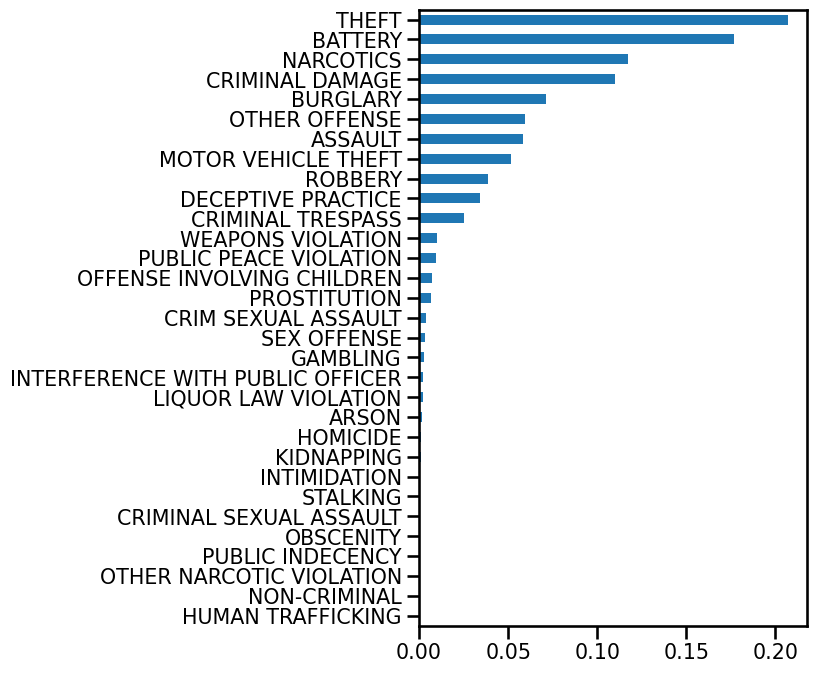

In [106]:
## Inspect the value_counts for the different types of crimes
crime_counts = df_ts['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8));

- I am going to be getting the crime data and the counts for each day, so I am going to resample the dataset for day.

In [107]:
# get list of  unique crimes
crime_list = df_ts['Primary Type'].unique()
crime_list

array(['OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'THEFT', 'BATTERY',
       'CRIMINAL DAMAGE', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT',
       'OTHER OFFENSE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'LIQUOR LAW VIOLATION',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON',
       'CRIMINAL SEXUAL ASSAULT', 'GAMBLING', 'STALKING', 'HOMICIDE',
       'KIDNAPPING', 'INTIMIDATION', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING'], dtype=object)

In [108]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a df of just the rows that match the crime
    temp = df_ts.loc[ df_ts['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
    temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
    CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'OTHER OFFENSE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'CRIMINAL SEXUAL ASSAULT', 'GAMBLING', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL', 'HUMAN TRAFFICKING'])

In [109]:
# converting the dictionary to a dataframe
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,BATTERY,CRIMINAL DAMAGE,SEX OFFENSE,CRIM SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,...,GAMBLING,STALKING,HOMICIDE,KIDNAPPING,INTIMIDATION,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,HUMAN TRAFFICKING
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,124,85,334,273,94,37,54,104,40,101,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,4,115,183,113,68,2,4,66,46,27,...,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,7,86,148,136,80,1,3,62,44,24,...,0.0,0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-04,6,105,196,127,76,1,4,70,43,47,...,0.0,0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-05,5,138,206,105,91,4,4,59,33,32,...,0.0,1,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0,81,143,109,66,1,2,52,38,28,...,0.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2010-12-28,3,97,149,122,83,4,2,55,57,33,...,1.0,0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2010-12-29,2,99,148,121,82,2,2,53,41,23,...,NaN,0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN


In [110]:
## saving to disk for later
crimes_df.to_csv("Data/Chicago/chicago_crime_counts_2010.csv")

# Question 1: Which district has the most crimes? Which has the least?

- For this Dataset, each row represents a crime that was committed. In this case, I am looking at crime in the year 2010.

In [111]:
df_ts['District'].value_counts().sort_index(ascending = False)

31.0       25
25.0    23050
24.0    11265
22.0    12766
20.0     6103
19.0    16180
18.0    15197
17.0    11288
16.0    11951
15.0    16713
14.0    15195
12.0    17269
11.0    22586
10.0    16130
9.0     18528
8.0     26528
7.0     22616
6.0     21398
5.0     16286
4.0     21221
3.0     19705
2.0     15968
1.0     12526
Name: District, dtype: int64

## Visualizing the Total Crimes by District

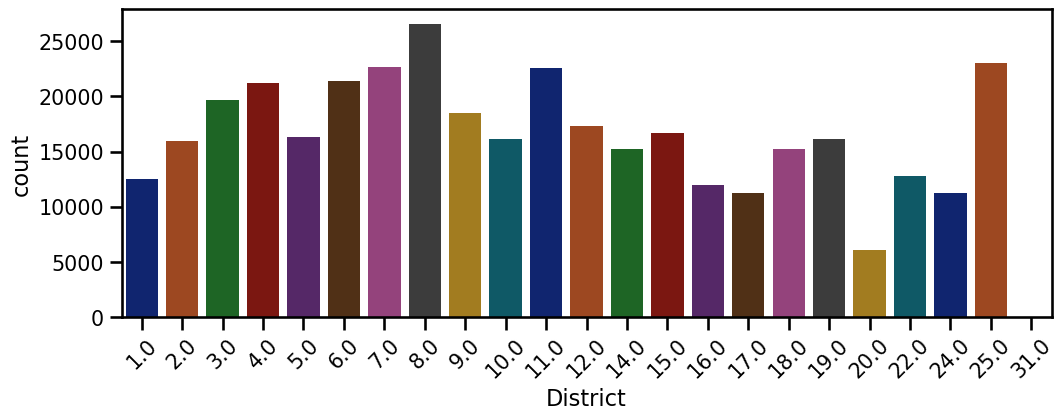

In [112]:
## visualizing crimes by district
fig, ax = plt.subplots()
sns.countplot(data=df_ts, x='District',palette='dark')
ax.xaxis.set_tick_params(rotation=45);

In [113]:
# finding the districts with the most and least crimes
df_ts['District'].value_counts(ascending=False).to_frame(name='# of Crimes')

,# of Crimes
8.0,26528
25.0,23050
7.0,22616
11.0,22586
6.0,21398
4.0,21221
3.0,19705
9.0,18528
12.0,17269
15.0,16713


- The district with the most crimes in 2010 was district 8 with 26,528 crimes, while district 31 had the least with 25 crimes. I want to know the crimes that were committed in district 31 in order to better understand why the number of crimes were so low.

## Better Understanding Low Crime District 31

In [114]:
df_31 = df_ts[df_ts['District'] == 31.0]
df_31

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2010-01-14 08:00:00,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-01-14 11:15:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-01-20 15:00:00,THEFT,$500 AND UNDER,AIRPORT PARKING LOT,False,False,1654,31.0,NaN
2010-01-21 18:00:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-02-02 23:15:00,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1654,31.0,NaN
2010-03-04 23:00:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,1654,31.0,NaN
2010-04-02 23:29:00,CRIMINAL TRESPASS,TO VEHICLE,STREET,False,False,2422,31.0,49.0
2010-04-08 08:40:00,THEFT,OVER $500,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,31.0,NaN
2010-05-20 13:00:00,THEFT,$500 AND UNDER,OTHER,False,False,1654,31.0,41.0


In [115]:
df_31['Primary Type'].value_counts(ascending=False)

THEFT                  10
CRIMINAL DAMAGE         8
DECEPTIVE PRACTICE      2
BATTERY                 2
ASSAULT                 1
CRIMINAL TRESPASS       1
MOTOR VEHICLE THEFT     1
Name: Primary Type, dtype: int64

- It appears that the crimes committed in district 31 were smaller crimes, with theft as the most common type of crime.

# Question 2: What months have the most crime? What months have the least?

In [119]:
month = df_ts.resample('M').size().sort_values(ascending=False)
month

Datetime
2010-08-31    34162
2010-07-31    33515
2010-05-31    33414
2010-06-30    32728
2010-10-31    32401
2010-03-31    32344
2010-09-30    31900
2010-04-30    31676
2010-01-31    29256
2010-11-30    28896
2010-12-31    25247
2010-02-28    24955
dtype: int64

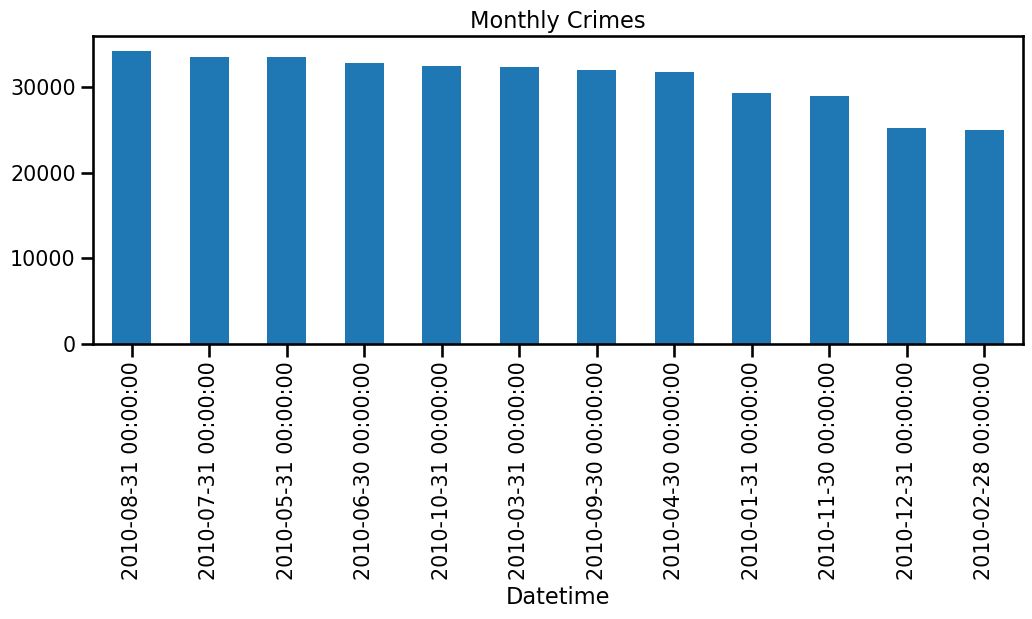

In [127]:
month.plot(title='Monthly Crimes',kind='bar');

- It appears that most crimes happen in the month of August, while the least number of crimes happen in February.

## Question 2a: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [131]:
# viewing crimes by month
month_crimes = crimes_df.resample('M').sum()
month_crimes

,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,BATTERY,CRIMINAL DAMAGE,SEX OFFENSE,CRIM SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,...,GAMBLING,STALKING,HOMICIDE,KIDNAPPING,INTIMIDATION,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,HUMAN TRAFFICKING
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-31,312,3816,6075,4667,2800,102,135,1989,1486,1109,...,12.0,17,22.0,32.0,23.0,1.0,0.0,0.0,0.0,0.0
2010-02-28,189,3983,4803,4252,2452,64,80,1757,1435,987,...,22.0,12,22.0,29.0,12.0,4.0,0.0,0.0,0.0,0.0
2010-03-31,232,4395,6094,6028,3760,89,125,2047,1902,1106,...,48.0,10,31.0,34.0,21.0,2.0,1.0,1.0,0.0,0.0
2010-04-30,221,3787,6135,5864,3853,83,102,1936,1970,1120,...,107.0,20,46.0,30.0,23.0,3.0,1.0,0.0,0.0,0.0
2010-05-31,242,3669,6722,6409,3807,111,130,1992,2087,994,...,115.0,17,46.0,37.0,15.0,3.0,0.0,1.0,0.0,0.0
2010-06-30,202,3345,6912,6332,3586,114,118,1930,2034,1085,...,98.0,21,49.0,21.0,26.0,4.0,1.0,1.0,0.0,0.0
2010-07-31,214,3517,7194,6310,3742,104,122,1886,2054,1155,...,143.0,16,42.0,21.0,15.0,5.0,1.0,0.0,1.0,0.0
2010-08-31,235,3669,7490,6057,3748,123,122,1816,2016,1077,...,137.0,13,57.0,22.0,15.0,0.0,1.0,1.0,0.0,0.0
2010-09-30,195,3615,6977,5362,3469,103,115,1659,1878,1051,...,119.0,18,31.0,23.0,16.0,3.0,0.0,1.0,0.0,0.0


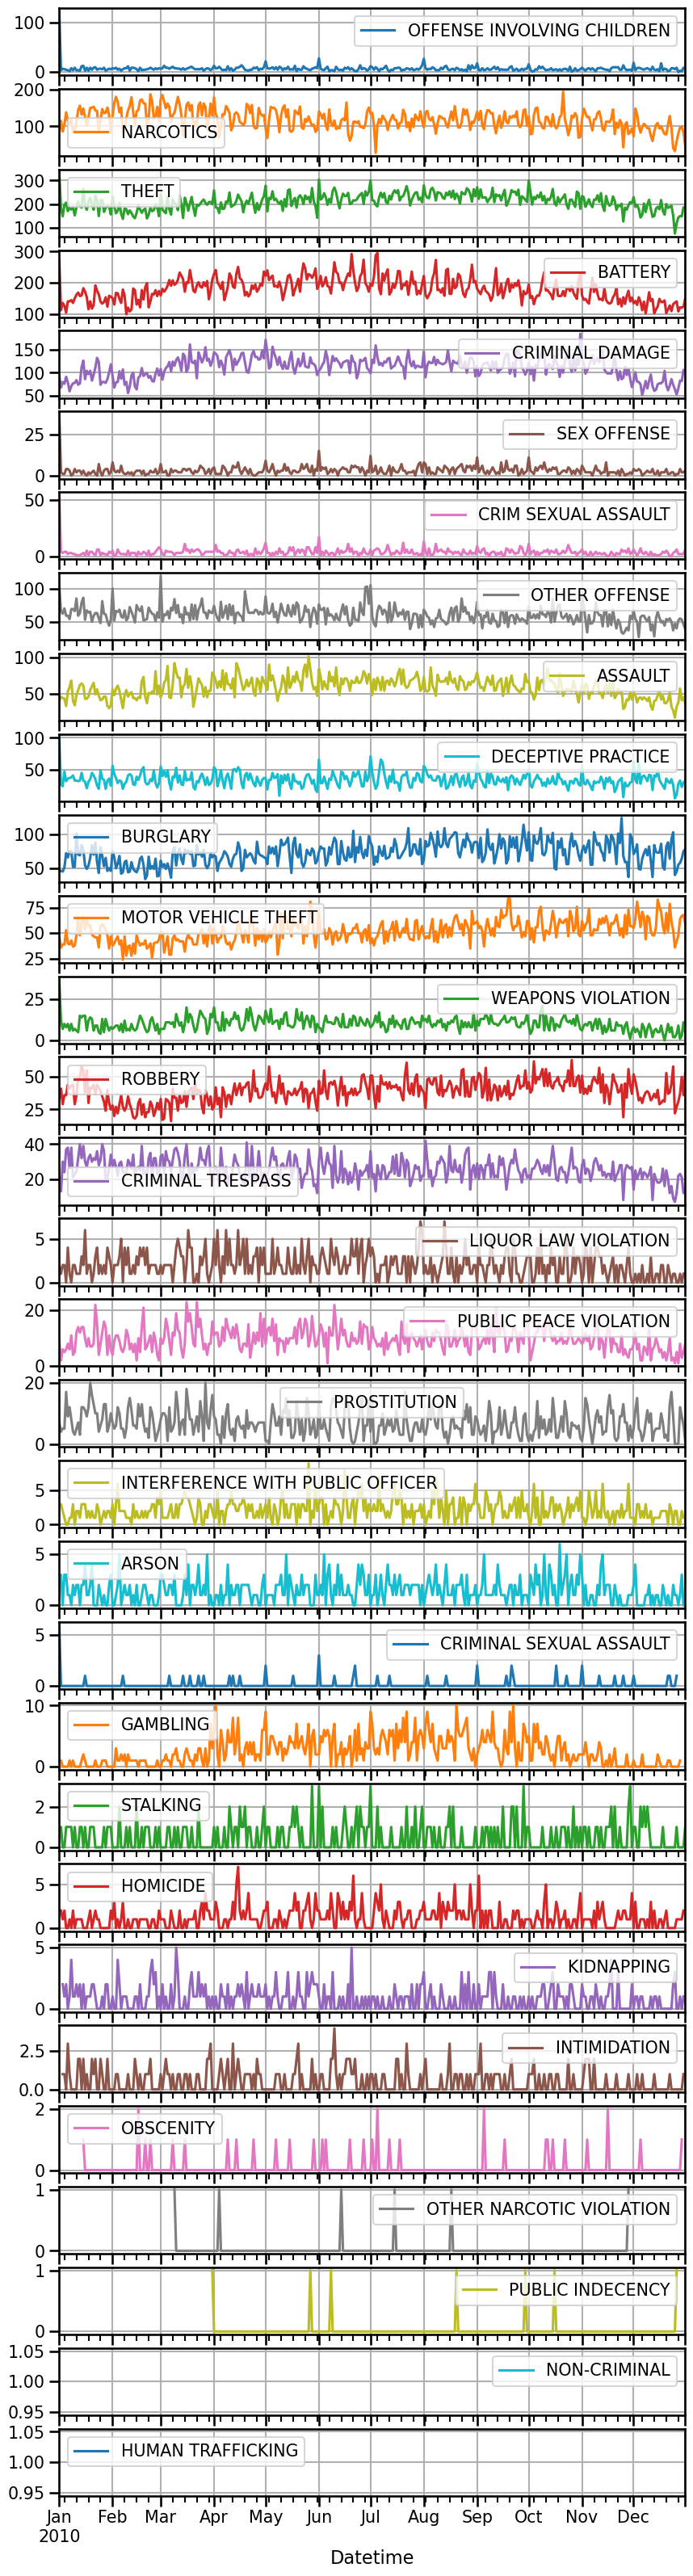

In [140]:
crimes_df.plot(subplots=True,figsize=(10,40),grid=True);

- From the plot above, sexual assault crimes seem to not follow the pattern of having more crimes in August and lower in February. The offenses that don't have high numbers also do not follow this pattern.

# Question 3: Are there any holidays that show an increase in the # of crimes? Are there any holidays that show a decrease in the # of crimes?

In [142]:
# Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [144]:
## Map the api's .get method onto the df to get all holidays
df_ts['holiday'] = df_ts.index.map(us_holidays.get)
df_ts['holiday'].unique()

array(["New Year's Day", None, 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Independence Day (Observed)', 'Labor Day', 'Columbus Day',
       'Veterans Day', 'Thanksgiving', 'Christmas Day (Observed)',
       'Christmas Day', "New Year's Day (Observed)"], dtype=object)

In [149]:
# counts of holidays with crimes
holiday_crimes = df_ts['holiday'].value_counts()
holiday_crimes

New Year's Day                 1463
Independence Day (Observed)    1111
Labor Day                      1055
Veterans Day                   1045
Columbus Day                   1019
Independence Day                999
Martin Luther King Jr. Day      909
New Year's Day (Observed)       832
Washington's Birthday           828
Memorial Day                    811
Christmas Day (Observed)        744
Thanksgiving                    667
Christmas Day                   503
Name: holiday, dtype: int64

<AxesSubplot: >

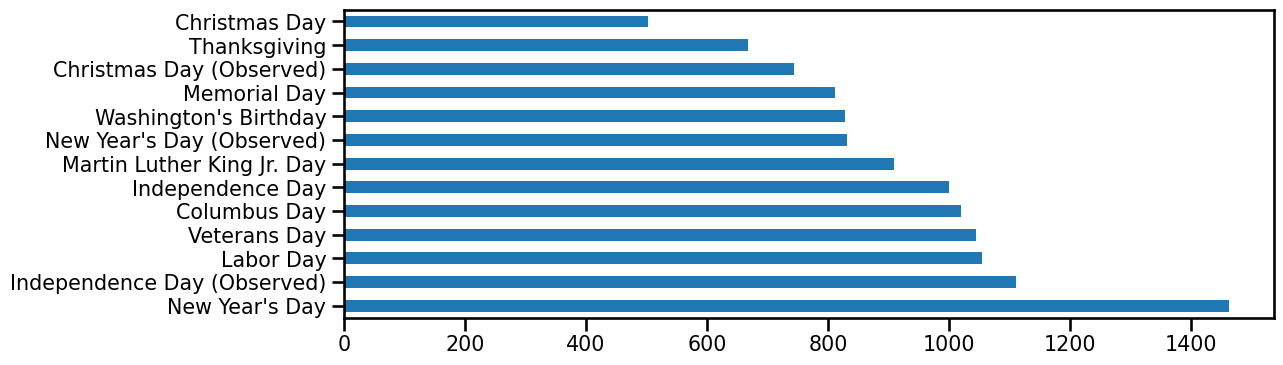

In [151]:
holiday_crimes.plot(kind='barh')

- For 2010, Christmas Day showed the lowest number of crimes, while the most crimes were committed on New Year's Day.